In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# stop warnings
import warnings 
warnings.filterwarnings('ignore')

In [3]:
sys.path.append('../scripts')

In [4]:
import yfinance as yf

# Define the assets and date range
assets = ["TSLA", "BND", "SPY"]
start_date = "2015-01-01"
end_date = "2024-10-31"

# Create the data folder if it doesn't exist
if not os.path.exists("data"):
    os.makedirs("data")

# Download data for each asset and save it to a CSV file in the data folder
for asset in assets:
    data = yf.download(asset, start=start_date, end=end_date)
    file_path = os.path.join("data", f"{asset}_data.csv")
    data.to_csv(file_path)  # Save each asset's data to CSV in 'data' folder
    print(f"{asset} data saved to {file_path}")

# Display a sample of the data for TSLA
data.head()


[*********************100%***********************]  1 of 1 completed


TSLA data saved to data\TSLA_data.csv


[*********************100%***********************]  1 of 1 completed


BND data saved to data\BND_data.csv


[*********************100%***********************]  1 of 1 completed

SPY data saved to data\SPY_data.csv


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,SPY,SPY,SPY,SPY,SPY,SPY
Date,,,,,,
2015-01-02 00:00:00+00:00,173.173782,205.429993,206.880005,204.179993,206.380005,121465900
2015-01-05 00:00:00+00:00,170.046310,201.720001,204.369995,201.350006,204.169998,169632600
2015-01-06 00:00:00+00:00,168.444626,199.820007,202.720001,198.860001,202.089996,209151400
2015-01-07 00:00:00+00:00,170.543686,202.309998,202.720001,200.880005,201.419998,125346700
2015-01-08 00:00:00+00:00,173.569977,205.899994,206.160004,203.990005,204.009995,147217800


In [5]:
# Load and display the saved Tesla data
tsla_data = pd.read_csv('../data/TSLA_data.csv')
tsla_data.head()

,Price,Adj Close,Close,High,Low,Open,Volume
0,Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA
1,Date,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-01-02 00:00:00+00:00,14.620667457580566,14.620667457580566,14.883333206176758,14.21733283996582,14.857999801635742,71466000
3,2015-01-05 00:00:00+00:00,14.005999565124512,14.005999565124512,14.433333396911621,13.810667037963867,14.303333282470703,80527500
4,2015-01-06 00:00:00+00:00,14.085332870483398,14.085332870483398,14.279999732971191,13.61400032043457,14.003999710083008,93928500


In [6]:
tsla_data.columns

Index(['Price', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

In [12]:
import pandas as pd

# Define the file paths
file_paths = {
    'TSLA': '../data/TSLA_data.csv',
    'BND': '../data/BND_data.csv',
    'SPY': '../data/SPY_data.csv'
}

# Define the expected columns in the desired order
columns_order = ['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']

for asset, file_path in file_paths.items():
    # Load the data
    df = pd.read_csv(file_path)
    
    # Rename the 'Price' column to 'Date'
    df.rename(columns={'Price': 'Date'}, inplace=True)
    
    # Drop the first two rows
    df = df.drop([0, 1]).reset_index(drop=True)
    
    # Ensure columns are in the specified order
    df = df[columns_order]
    
    # Save the cleaned dataset
    cleaned_path = f"../data/cleaned_{asset}_data.csv"
    df.to_csv(cleaned_path, index=False)
    print(f"Cleaned data saved to {cleaned_path}")


Cleaned data saved to ../data/cleaned_TSLA_data.csv
Cleaned data saved to ../data/cleaned_BND_data.csv
Cleaned data saved to ../data/cleaned_SPY_data.csv


### Data Processing 

In [13]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline
def preprocess_and_explore_data(file_path, output_path):
    # Load the dataset
    df = pd.read_csv(file_path)

    # Display initial data sample and info
    print(f"\nProcessing {file_path}")
    print("Initial Data Sample:")
    display(df.head())

    # Display data info
    print("\nData Information:")
    display(df.info())

    # Summary statistics
    print("\nBasic Statistics:")
    display(df.describe())

    # Handle missing values by interpolating (suitable for time series)
    df.interpolate(method='linear', inplace=True)
    
    # Confirm missing values are handled
    print("\nMissing Values After Handling:")
    display(df.isnull().sum())

    # Convert 'Date' column to datetime format
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    print("\nData Types After Date Conversion:")
    print(df.dtypes)

    # Define columns to scale
    cols_to_scale = ['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']

    # Normalize the data
    scaler = MinMaxScaler()
    df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

    # Display the scaled data sample
    print("\nData after Scaling:")
    display(df.head())

    # Save the preprocessed dataset
    df.to_csv(output_path, index=False)
    print(f"Preprocessed data saved to {output_path}")

    # Plot histograms to understand distributions
    df[cols_to_scale].hist(bins=30, figsize=(12, 8))
    plt.suptitle(f"Histograms of Numerical Columns in {file_path}")
    plt.show()

    # Optional: Box plots to check for outliers
    df[cols_to_scale].plot(kind='box', subplots=True, layout=(2, 3), figsize=(12, 8), title="Box Plots of Numerical Columns")
    plt.suptitle(f"Box Plots of Numerical Columns in {file_path}")
    plt.show()



Processing ../data/cleaned_BND_data.csv
Initial Data Sample:


,Date,Adj Close,Close,High,Low,Open,Volume
0,2015-01-02 00:00:00+00:00,63.358780,82.650002,82.690002,82.419998,82.430000,2218800
1,2015-01-05 00:00:00+00:00,63.542706,82.889999,82.919998,82.699997,82.739998,5820100
2,2015-01-06 00:00:00+00:00,63.726700,83.129997,83.379997,83.029999,83.029999,3887600
3,2015-01-07 00:00:00+00:00,63.765057,83.180000,83.279999,83.050003,83.139999,2433400
4,2015-01-08 00:00:00+00:00,63.665421,83.050003,83.110001,82.970001,83.110001,1873400



Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2474 entries, 0 to 2473
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2474 non-null   object 
 1   Adj Close  2474 non-null   float64
 2   Close      2474 non-null   float64
 3   High       2474 non-null   float64
 4   Low        2474 non-null   float64
 5   Open       2474 non-null   float64
 6   Volume     2474 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 135.4+ KB


None


Basic Statistics:


,Adj Close,Close,High,Low,Open,Volume
count,2474.000000,2474.000000,2474.000000,2474.000000,2474.000000,2.474000e+03
mean,70.089252,80.316039,80.431152,80.198464,80.319968,4.169014e+06
std,4.889918,5.097592,5.082268,5.113232,5.100419,2.778389e+06
min,62.637554,68.040001,68.379997,67.989998,68.080002,0.000000e+00
25%,66.314070,76.379997,76.674999,76.265001,76.502501,2.024900e+06
50%,68.888927,81.410004,81.519997,81.300003,81.410004,3.710900e+06
75%,73.807495,84.010002,84.167500,83.937502,84.047503,5.519825e+06
max,79.812943,89.480003,89.589996,89.440002,89.550003,3.193720e+07



Missing Values After Handling:


Date         0
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64


Data Types After Date Conversion:
Date         datetime64[ns, UTC]
Adj Close                float64
Close                    float64
High                     float64
Low                      float64
Open                     float64
Volume                     int64
dtype: object

Data after Scaling:


,Date,Adj Close,Close,High,Low,Open,Volume
0,2015-01-02 00:00:00+00:00,0.041992,0.681437,0.674682,0.672727,0.668374,0.069474
1,2015-01-05 00:00:00+00:00,0.052700,0.692630,0.685526,0.685781,0.682813,0.182236
2,2015-01-06 00:00:00+00:00,0.063413,0.703824,0.707214,0.701165,0.696320,0.121726
3,2015-01-07 00:00:00+00:00,0.065646,0.706157,0.702499,0.702098,0.701444,0.076193
4,2015-01-08 00:00:00+00:00,0.059845,0.700093,0.694484,0.698368,0.700046,0.058659


Preprocessed data saved to ../data/preprocessed_BND_data.csv


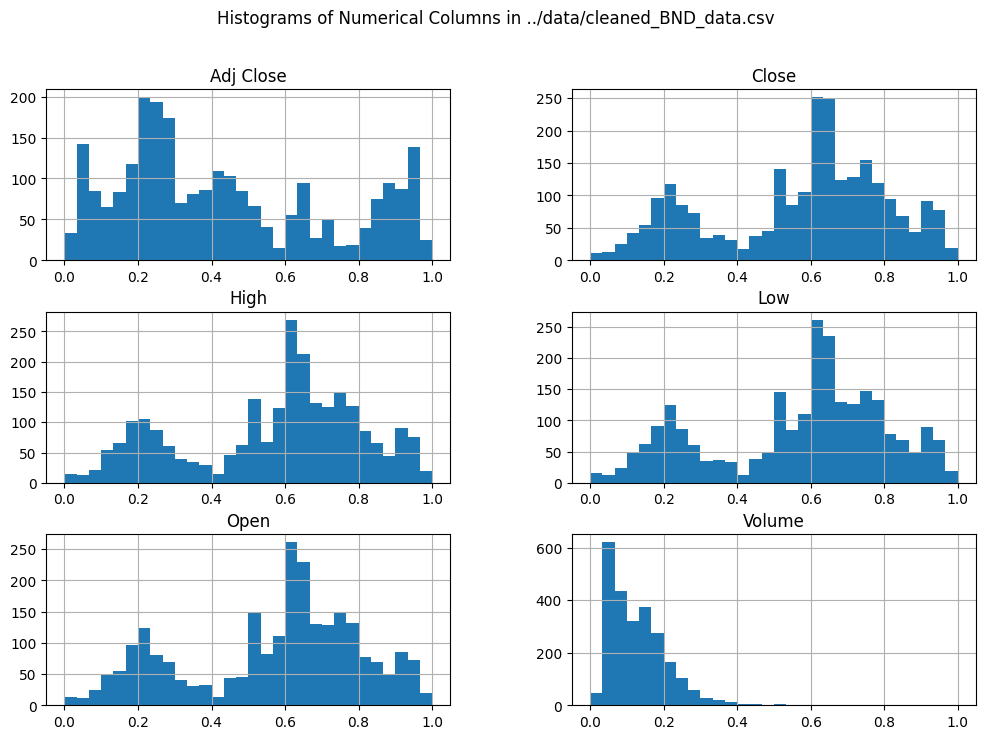

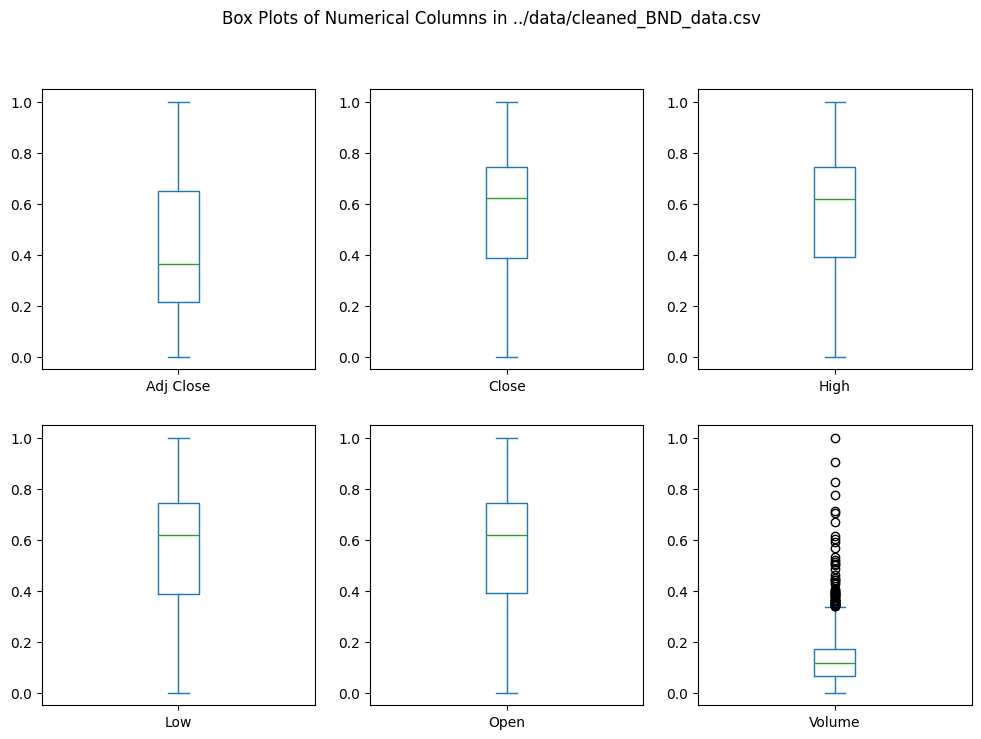


Processing ../data/cleaned_SPY_data.csv
Initial Data Sample:


,Date,Adj Close,Close,High,Low,Open,Volume
0,2015-01-02 00:00:00+00:00,173.173782,205.429993,206.880005,204.179993,206.380005,121465900
1,2015-01-05 00:00:00+00:00,170.046326,201.720001,204.369995,201.350006,204.169998,169632600
2,2015-01-06 00:00:00+00:00,168.444672,199.820007,202.720001,198.860001,202.089996,209151400
3,2015-01-07 00:00:00+00:00,170.543732,202.309998,202.720001,200.880005,201.419998,125346700
4,2015-01-08 00:00:00+00:00,173.569977,205.899994,206.160004,203.990005,204.009995,147217800



Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2474 entries, 0 to 2473
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2474 non-null   object 
 1   Adj Close  2474 non-null   float64
 2   Close      2474 non-null   float64
 3   High       2474 non-null   float64
 4   Low        2474 non-null   float64
 5   Open       2474 non-null   float64
 6   Volume     2474 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 135.4+ KB


None


Basic Statistics:


,Adj Close,Close,High,Low,Open,Volume
count,2474.000000,2474.000000,2474.000000,2474.000000,2474.000000,2.474000e+03
mean,310.253154,330.623634,332.368856,328.614426,330.570376,8.810268e+07
std,111.250655,103.324179,103.840765,102.719137,103.311248,4.491678e+07
min,157.328583,182.860001,184.100006,181.020004,182.339996,2.027000e+07
25%,214.822334,242.130001,243.380005,240.692501,242.302498,5.960170e+07
50%,275.812378,298.089996,299.324997,296.804993,298.095001,7.696935e+07
75%,402.297516,416.212502,418.242500,413.687500,416.240005,1.027178e+08
max,584.590027,584.590027,586.119995,582.580017,585.909973,5.072443e+08



Missing Values After Handling:


Date         0
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64


Data Types After Date Conversion:
Date         datetime64[ns, UTC]
Adj Close                float64
Close                    float64
High                     float64
Low                      float64
Open                     float64
Volume                     int64
dtype: object

Data after Scaling:


,Date,Adj Close,Close,High,Low,Open,Volume
0,2015-01-02 00:00:00+00:00,0.037085,0.056182,0.056664,0.057675,0.059568,0.207805
1,2015-01-05 00:00:00+00:00,0.029766,0.046947,0.050420,0.050628,0.054092,0.306716
2,2015-01-06 00:00:00+00:00,0.026017,0.042217,0.046316,0.044427,0.048938,0.387867
3,2015-01-07 00:00:00+00:00,0.030930,0.048416,0.046316,0.049457,0.047278,0.215775
4,2015-01-08 00:00:00+00:00,0.038013,0.057352,0.054873,0.057202,0.053696,0.260687


Preprocessed data saved to ../data/preprocessed_SPY_data.csv


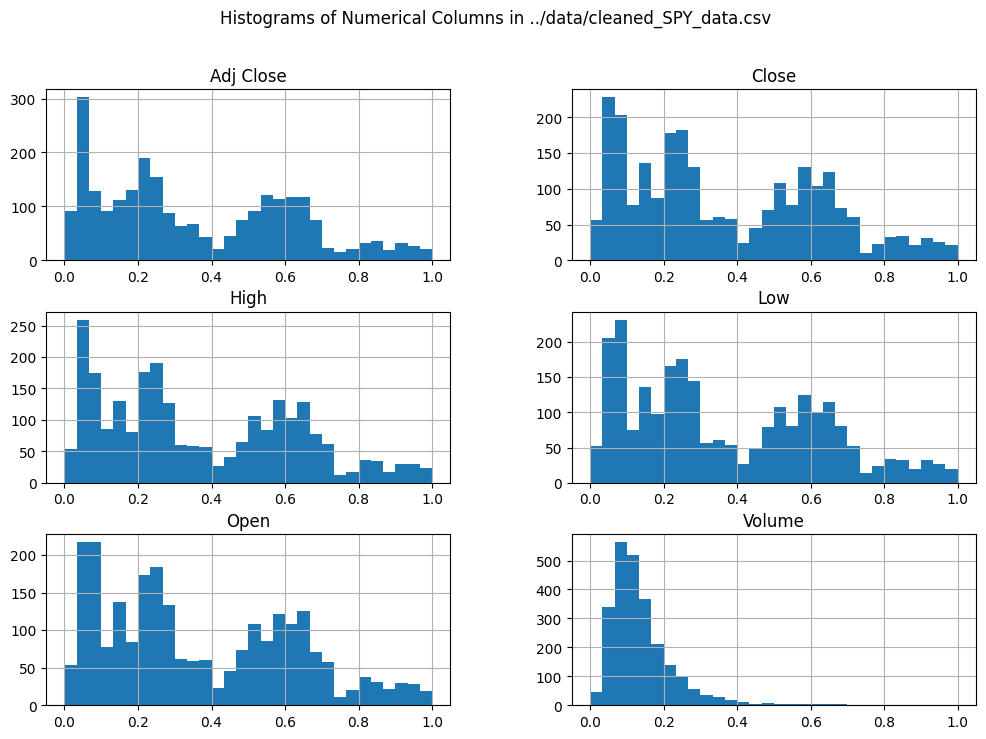

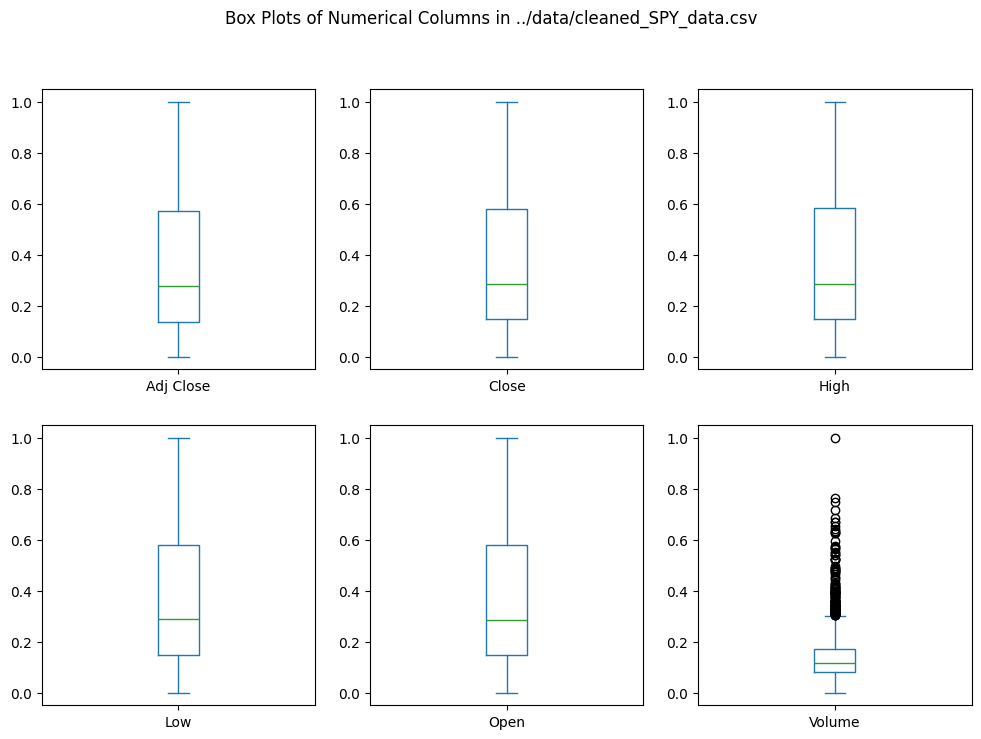


Processing ../data/cleaned_TSLA_data.csv
Initial Data Sample:


,Date,Adj Close,Close,High,Low,Open,Volume
0,2015-01-02 00:00:00+00:00,14.620667,14.620667,14.883333,14.217333,14.858000,71466000
1,2015-01-05 00:00:00+00:00,14.006000,14.006000,14.433333,13.810667,14.303333,80527500
2,2015-01-06 00:00:00+00:00,14.085333,14.085333,14.280000,13.614000,14.004000,93928500
3,2015-01-07 00:00:00+00:00,14.063333,14.063333,14.318667,13.985333,14.223333,44526000
4,2015-01-08 00:00:00+00:00,14.041333,14.041333,14.253333,14.000667,14.187333,51637500



Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2474 entries, 0 to 2473
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2474 non-null   object 
 1   Adj Close  2474 non-null   float64
 2   Close      2474 non-null   float64
 3   High       2474 non-null   float64
 4   Low        2474 non-null   float64
 5   Open       2474 non-null   float64
 6   Volume     2474 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 135.4+ KB


None


Basic Statistics:


,Adj Close,Close,High,Low,Open,Volume
count,2474.000000,2474.000000,2474.000000,2474.000000,2474.000000,2.474000e+03
mean,111.438965,111.438965,113.895836,108.869421,111.461872,1.125745e+08
std,110.120450,110.120450,112.643277,107.541830,110.208156,7.449619e+07
min,9.578000,9.578000,10.331333,9.403333,9.488000,1.062000e+07
25%,17.066167,17.066167,17.368167,16.790167,17.058499,6.682590e+07
50%,25.043000,25.043000,25.279000,24.462334,24.986667,9.289395e+07
75%,216.865002,216.865002,221.910004,212.084999,217.264999,1.301899e+08
max,409.970001,409.970001,414.496674,405.666656,411.470001,9.140820e+08



Missing Values After Handling:


Date         0
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64


Data Types After Date Conversion:
Date         datetime64[ns, UTC]
Adj Close                float64
Close                    float64
High                     float64
Low                      float64
Open                     float64
Volume                     int64
dtype: object

Data after Scaling:


,Date,Adj Close,Close,High,Low,Open,Volume
0,2015-01-02 00:00:00+00:00,0.012594,0.012594,0.011263,0.012148,0.013359,0.067348
1,2015-01-05 00:00:00+00:00,0.011059,0.011059,0.010149,0.011122,0.011979,0.077377
2,2015-01-06 00:00:00+00:00,0.011257,0.011257,0.009770,0.010626,0.011234,0.092210
3,2015-01-07 00:00:00+00:00,0.011202,0.011202,0.009866,0.011563,0.011780,0.037529
4,2015-01-08 00:00:00+00:00,0.011147,0.011147,0.009704,0.011602,0.011690,0.045400


Preprocessed data saved to ../data/preprocessed_TSLA_data.csv


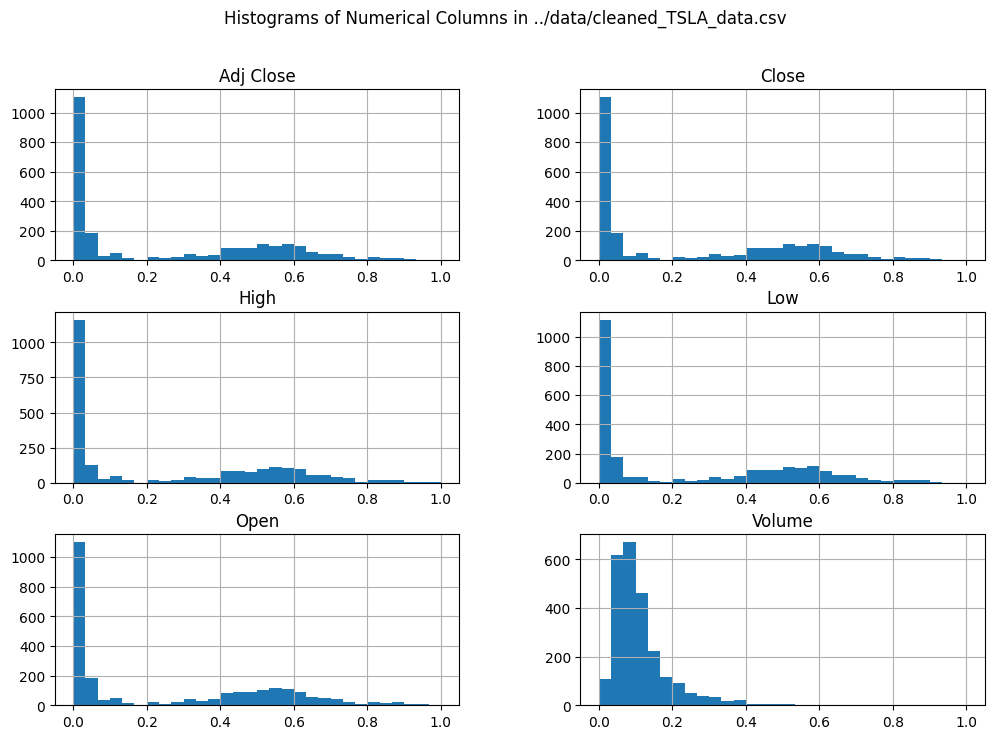

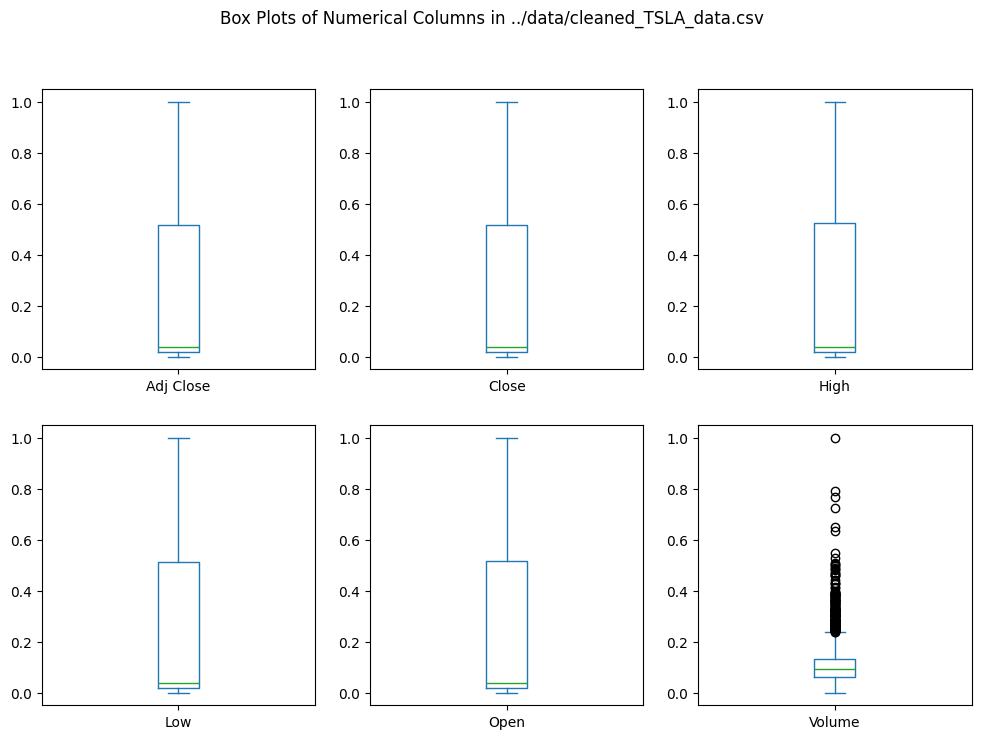

In [14]:
# File paths for the datasets
files = [
    {'input': '../data/cleaned_BND_data.csv', 'output': '../data/preprocessed_BND_data.csv'},
    {'input': '../data/cleaned_SPY_data.csv', 'output': '../data/preprocessed_SPY_data.csv'},
    {'input': '../data/cleaned_TSLA_data.csv', 'output': '../data/preprocessed_TSLA_data.csv'}
]

# Process each file
for file in files:
    preprocess_and_explore_data(file['input'], file['output'])


### EDA

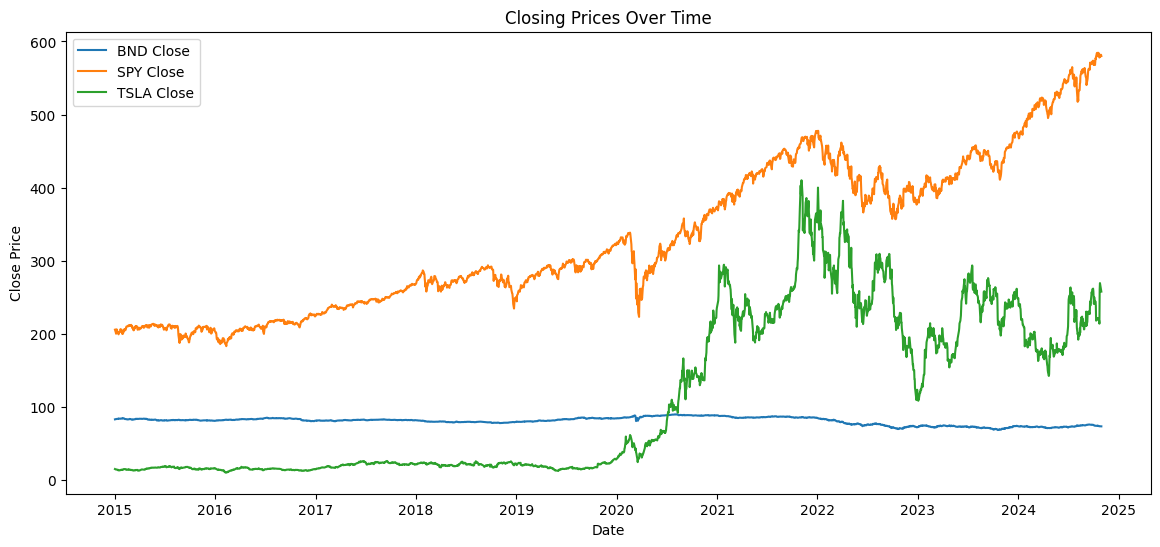

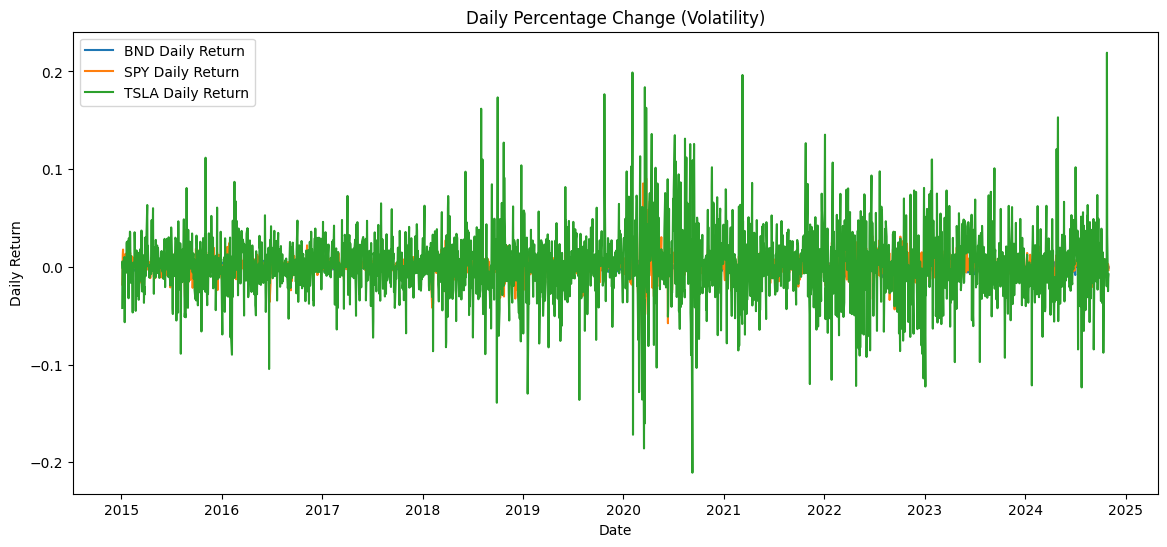

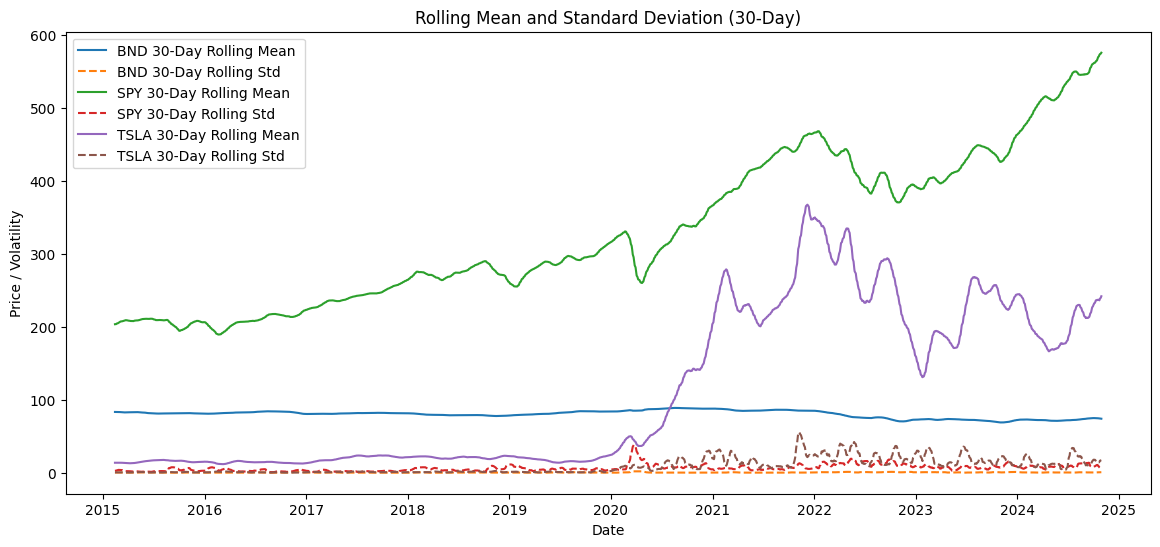

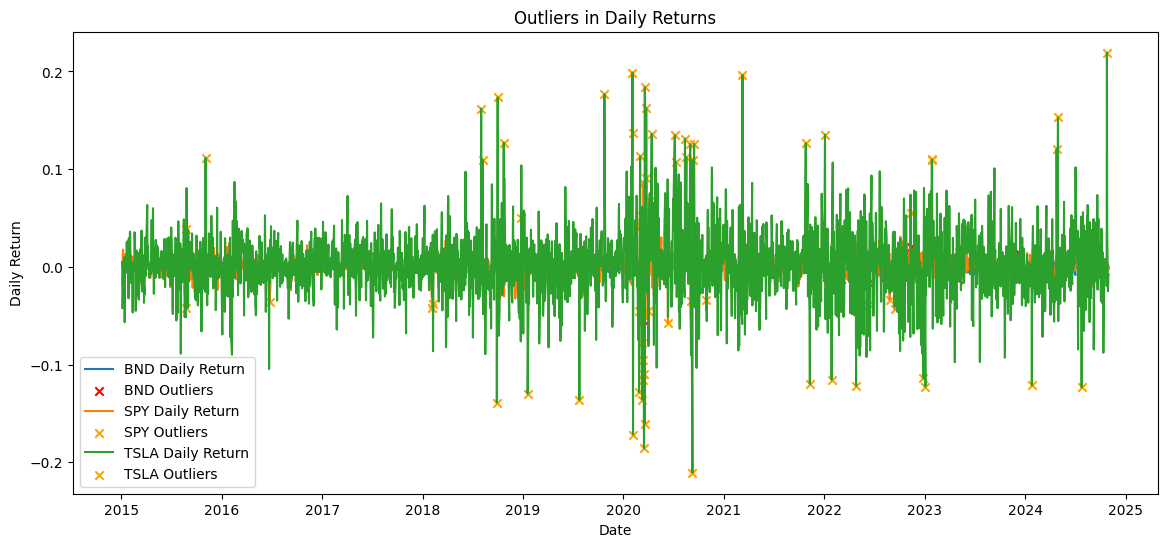

Top 5 Days with Highest Returns for BND:
Date
2020-03-13 00:00:00+00:00    0.042201
2020-03-23 00:00:00+00:00    0.022149
2022-11-10 00:00:00+00:00    0.020702
2020-03-20 00:00:00+00:00    0.016955
2022-09-28 00:00:00+00:00    0.015543
Name: Daily Return, dtype: float64

Top 5 Days with Lowest Returns for BND:
Date
2020-03-12 00:00:00+00:00   -0.054385
2020-03-18 00:00:00+00:00   -0.024140
2020-03-17 00:00:00+00:00   -0.020686
2020-03-11 00:00:00+00:00   -0.018940
2022-06-13 00:00:00+00:00   -0.016153
Name: Daily Return, dtype: float64

Top 5 Days with Highest Returns for SPY:
Date
2020-03-24 00:00:00+00:00    0.090603
2020-03-13 00:00:00+00:00    0.085486
2020-04-06 00:00:00+00:00    0.067166
2020-03-26 00:00:00+00:00    0.058390
2022-11-10 00:00:00+00:00    0.054954
Name: Daily Return, dtype: float64

Top 5 Days with Lowest Returns for SPY:
Date
2020-03-16 00:00:00+00:00   -0.109424
2020-03-12 00:00:00+00:00   -0.095677
2020-03-09 00:00:00+00:00   -0.078094
2020-06-11 00:00:00+00:00 

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned datasets
bnd_data = pd.read_csv('../data/cleaned_BND_data.csv')
spy_data = pd.read_csv('../data/cleaned_SPY_data.csv')
tsla_data = pd.read_csv('../data/cleaned_TSLA_data.csv')
# Convert 'Date' column to datetime format
bnd_data['Date'] = pd.to_datetime(bnd_data['Date'])
spy_data['Date'] = pd.to_datetime(spy_data['Date'])
tsla_data['Date'] = pd.to_datetime(tsla_data['Date'])

# Set 'Date' column as index for easy time series analysis
bnd_data.set_index('Date', inplace=True)
spy_data.set_index('Date', inplace=True)
tsla_data.set_index('Date', inplace=True)

# EDA: Visualize the Closing Price over Time
plt.figure(figsize=(14, 6))
plt.plot(bnd_data.index, bnd_data['Close'], label='BND Close')
plt.plot(spy_data.index, spy_data['Close'], label='SPY Close')
plt.plot(tsla_data.index, tsla_data['Close'], label='TSLA Close')
plt.title("Closing Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()

# EDA 2: Calculate and Plot the Daily Percentage Change to Observe Volatility
bnd_data['Daily Return'] = bnd_data['Close'].pct_change()
spy_data['Daily Return'] = spy_data['Close'].pct_change()
tsla_data['Daily Return'] = tsla_data['Close'].pct_change()

plt.figure(figsize=(14, 6))
plt.plot(bnd_data.index, bnd_data['Daily Return'], label='BND Daily Return')
plt.plot(spy_data.index, spy_data['Daily Return'], label='SPY Daily Return')
plt.plot(tsla_data.index, tsla_data['Daily Return'], label='TSLA Daily Return')
plt.title("Daily Percentage Change (Volatility)")
plt.xlabel("Date")
plt.ylabel("Daily Return")
plt.legend()
plt.show()

# EDA 3: Analyze Volatility with Rolling Means and Standard Deviations
# 30-day rolling mean and standard deviation for BND and SPY
bnd_data['Rolling Mean'] = bnd_data['Close'].rolling(window=30).mean()
bnd_data['Rolling Std'] = bnd_data['Close'].rolling(window=30).std()
spy_data['Rolling Mean'] = spy_data['Close'].rolling(window=30).mean()
spy_data['Rolling Std'] = spy_data['Close'].rolling(window=30).std()
tsla_data['Rolling Mean'] = tsla_data['Close'].rolling(window=30).mean()
tsla_data['Rolling Std'] = tsla_data['Close'].rolling(window=30).std()


plt.figure(figsize=(14, 6))
plt.plot(bnd_data.index, bnd_data['Rolling Mean'], label='BND 30-Day Rolling Mean')
plt.plot(bnd_data.index, bnd_data['Rolling Std'], label='BND 30-Day Rolling Std', linestyle='--')
plt.plot(spy_data.index, spy_data['Rolling Mean'], label='SPY 30-Day Rolling Mean')
plt.plot(spy_data.index, spy_data['Rolling Std'], label='SPY 30-Day Rolling Std', linestyle='--')
plt.plot(tsla_data.index, tsla_data['Rolling Mean'], label='TSLA 30-Day Rolling Mean')
plt.plot(tsla_data.index, tsla_data['Rolling Std'], label='TSLA 30-Day Rolling Std', linestyle='--')

plt.title("Rolling Mean and Standard Deviation (30-Day)")
plt.xlabel("Date")
plt.ylabel("Price / Volatility")
plt.legend()
plt.show()

# EDA 4: Outlier Detection on Daily Returns
# Outliers: Using a threshold of +/- 3 standard deviations for Daily Returns
bnd_outliers = bnd_data[np.abs(bnd_data['Daily Return']) > (3 * bnd_data['Daily Return'].std())]
spy_outliers = spy_data[np.abs(spy_data['Daily Return']) > (3 * spy_data['Daily Return'].std())]
tsla_outliers = tsla_data[np.abs(tsla_data['Daily Return']) > (3 * tsla_data['Daily Return'].std())]

# Plot outliers
plt.figure(figsize=(14, 6))
plt.plot(bnd_data.index, bnd_data['Daily Return'], label='BND Daily Return')
plt.scatter(bnd_outliers.index, bnd_outliers['Daily Return'], color='red', label='BND Outliers', marker='x')
plt.plot(spy_data.index, spy_data['Daily Return'], label='SPY Daily Return')
plt.scatter(spy_outliers.index, spy_outliers['Daily Return'], color='orange', label='SPY Outliers', marker='x')
plt.plot(tsla_data.index, tsla_data['Daily Return'], label='TSLA Daily Return')
plt.scatter(tsla_outliers.index, tsla_outliers['Daily Return'], color='orange', label='TSLA Outliers', marker='x')

plt.title("Outliers in Daily Returns")
plt.xlabel("Date")
plt.ylabel("Daily Return")
plt.legend()
plt.show()

# EDA 5: Analyze Days with Unusually High or Low Returns
# Top 5 highest and lowest daily returns for BND and SPY
print("Top 5 Days with Highest Returns for BND:")
print(bnd_data['Daily Return'].nlargest(5))
print("\nTop 5 Days with Lowest Returns for BND:")
print(bnd_data['Daily Return'].nsmallest(5))

print("\nTop 5 Days with Highest Returns for SPY:")
print(spy_data['Daily Return'].nlargest(5))
print("\nTop 5 Days with Lowest Returns for SPY:")
print(spy_data['Daily Return'].nsmallest(5))

print("\nTop 5 Days with Highest Returns for TSLA:")
print(tsla_data['Daily Return'].nlargest(5))
print("\nTop 5 Days with Lowest Returns for TSLA:")
print(tsla_data['Daily Return'].nsmallest(5))

### Seasonality and Trends

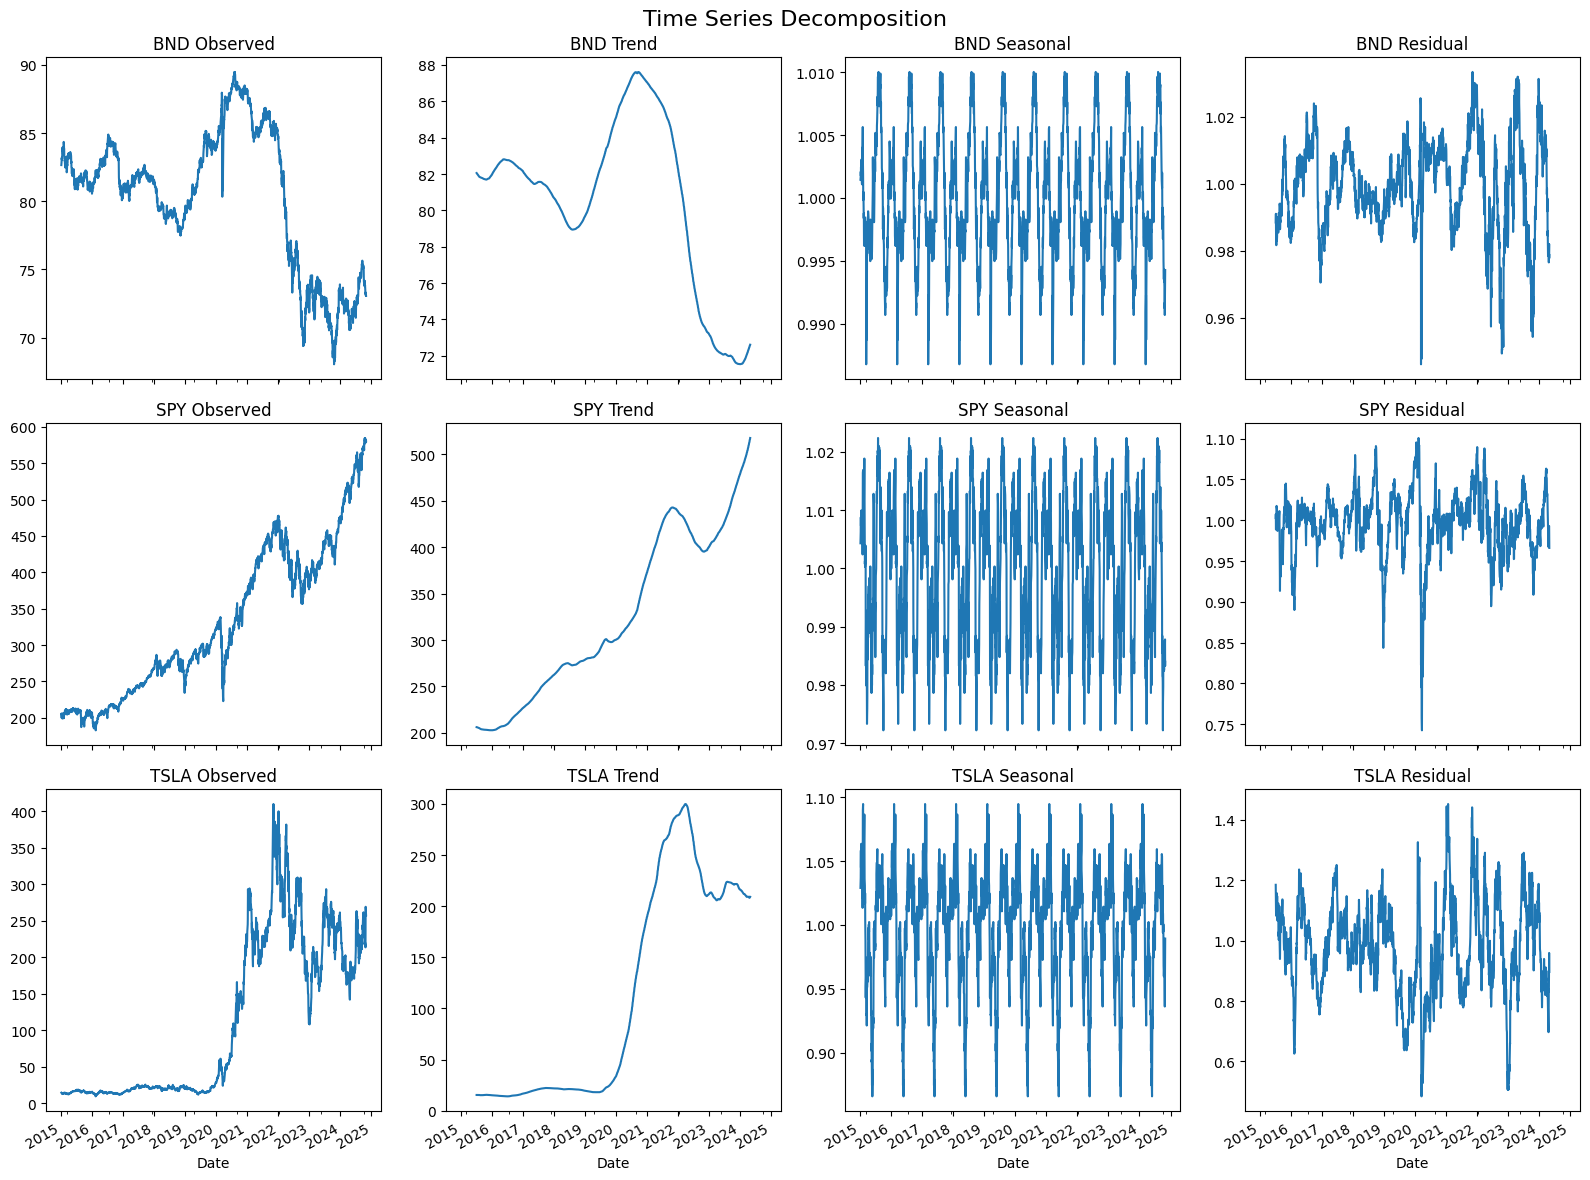

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose each time series
# Set frequency to 252 as it represents the number of trading days in a year
decomposition_bnd = seasonal_decompose(bnd_data['Close'], model='multiplicative', period=252)
decomposition_spy = seasonal_decompose(spy_data['Close'], model='multiplicative', period=252)
decomposition_tsla = seasonal_decompose(tsla_data['Close'], model='multiplicative', period=252)

# Plot decompositions
fig, axes = plt.subplots(3, 4, figsize=(16, 12), sharex=True)
fig.suptitle("Time Series Decomposition", fontsize=16)

# BND decomposition
axes[0, 0].set_title("BND Observed")
decomposition_bnd.observed.plot(ax=axes[0, 0], legend=False)
axes[0, 1].set_title("BND Trend")
decomposition_bnd.trend.plot(ax=axes[0, 1], legend=False)
axes[0, 2].set_title("BND Seasonal")
decomposition_bnd.seasonal.plot(ax=axes[0, 2], legend=False)
axes[0, 3].set_title("BND Residual")
decomposition_bnd.resid.plot(ax=axes[0, 3], legend=False)

# SPY decomposition
axes[1, 0].set_title("SPY Observed")
decomposition_spy.observed.plot(ax=axes[1, 0], legend=False)
axes[1, 1].set_title("SPY Trend")
decomposition_spy.trend.plot(ax=axes[1, 1], legend=False)
axes[1, 2].set_title("SPY Seasonal")
decomposition_spy.seasonal.plot(ax=axes[1, 2], legend=False)
axes[1, 3].set_title("SPY Residual")
decomposition_spy.resid.plot(ax=axes[1, 3], legend=False)

# TSLA decomposition
axes[2, 0].set_title("TSLA Observed")
decomposition_tsla.observed.plot(ax=axes[2, 0], legend=False)
axes[2, 1].set_title("TSLA Trend")
decomposition_tsla.trend.plot(ax=axes[2, 1], legend=False)
axes[2, 2].set_title("TSLA Seasonal")
decomposition_tsla.seasonal.plot(ax=axes[2, 2], legend=False)
axes[2, 3].set_title("TSLA Residual")
decomposition_tsla.resid.plot(ax=axes[2, 3], legend=False)

plt.tight_layout()
plt.show()

### Risk Analysis


Risk Analysis for BND:
95% Value at Risk: -0.51%
Sharpe Ratio: -0.57
Annualized Volatility: 5.49%


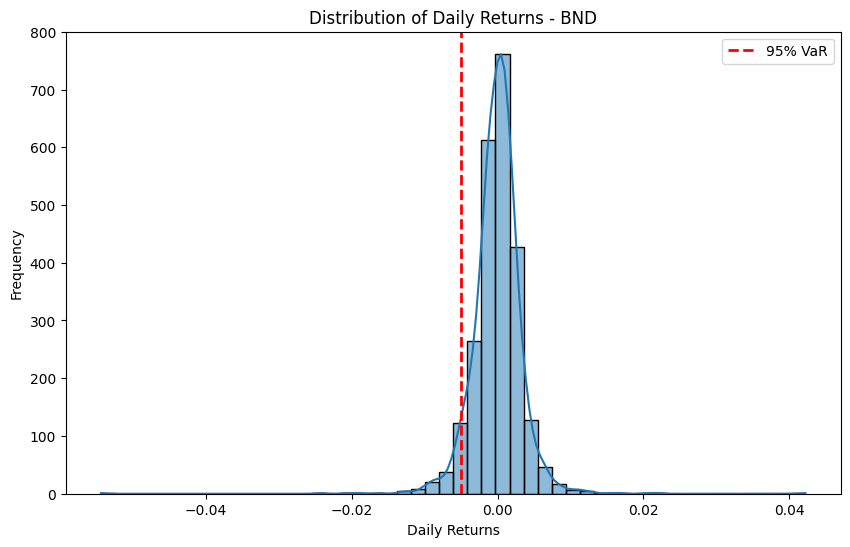

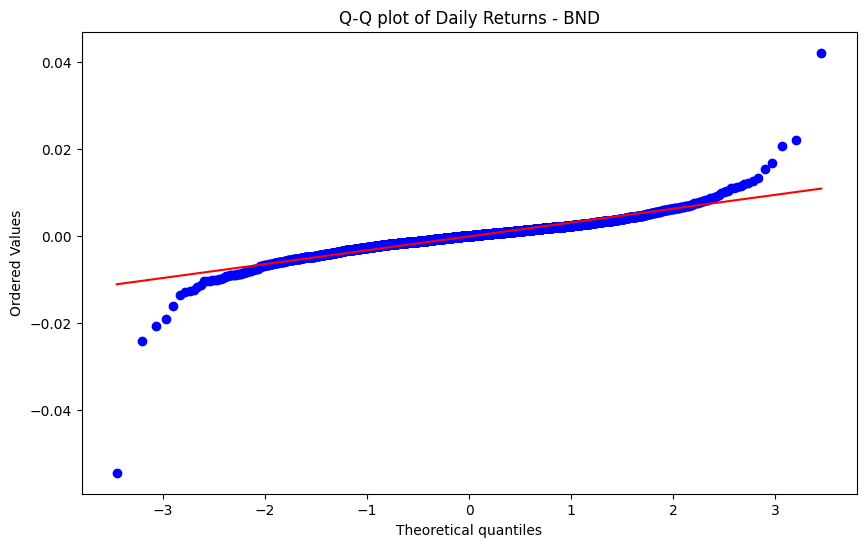


Risk Analysis for SPY:
95% Value at Risk: -1.68%
Sharpe Ratio: 0.57
Annualized Volatility: 17.75%


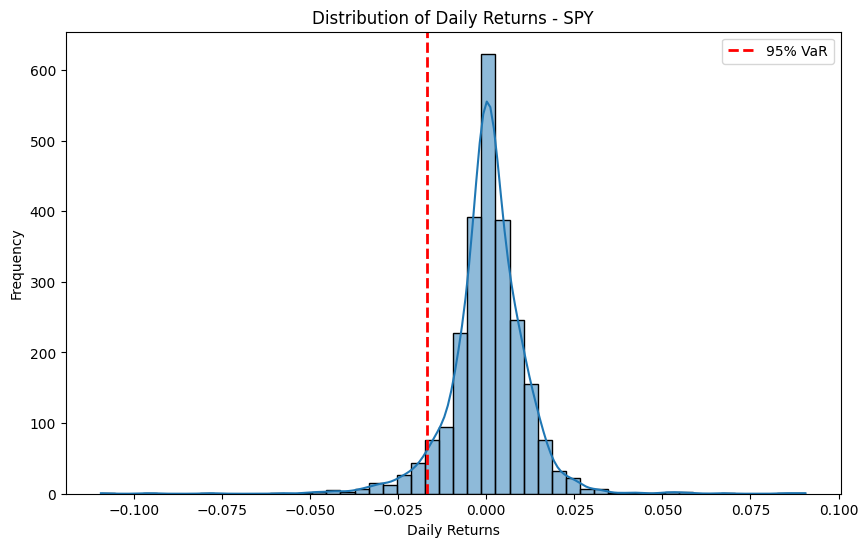

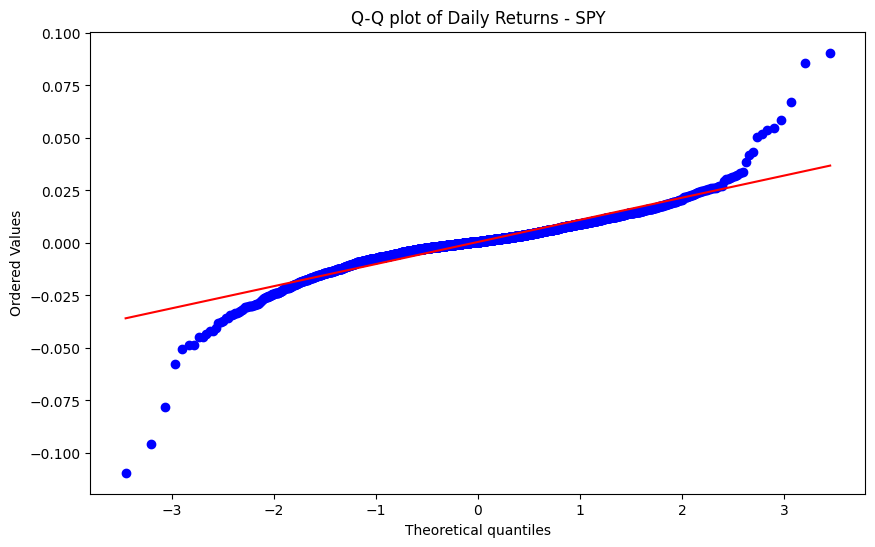


Risk Analysis for TSLA:
95% Value at Risk: -5.13%
Sharpe Ratio: 0.76
Annualized Volatility: 56.83%


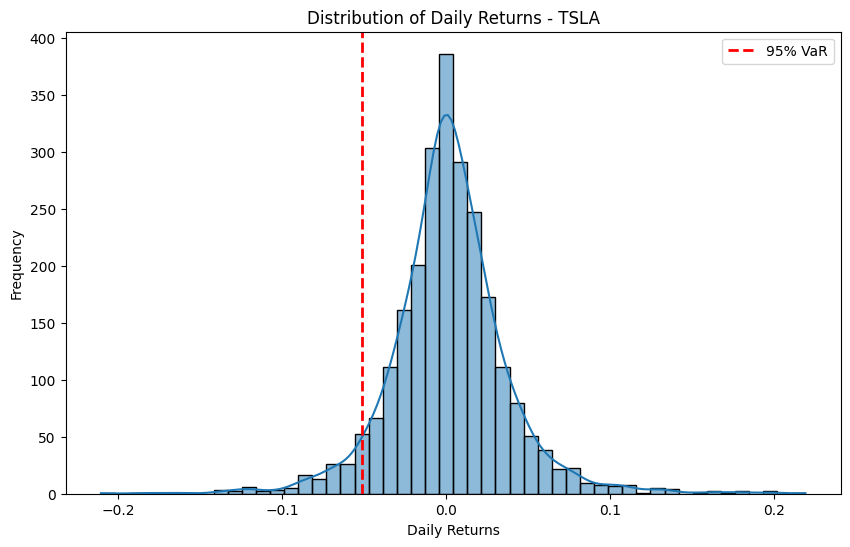

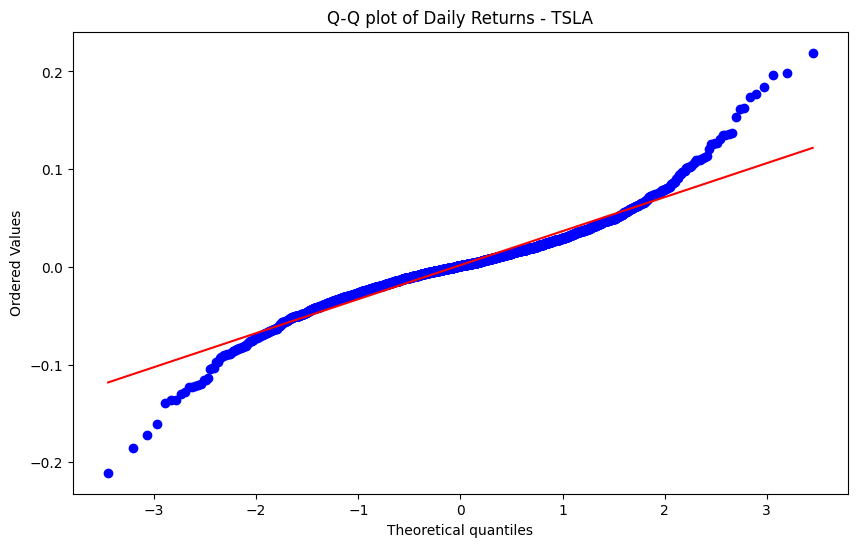

<Figure size 1000x600 with 0 Axes>

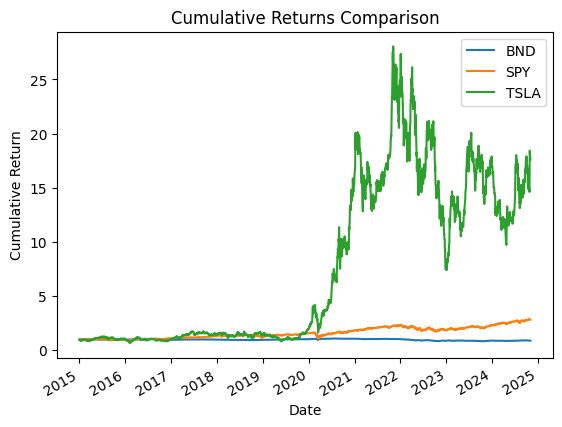

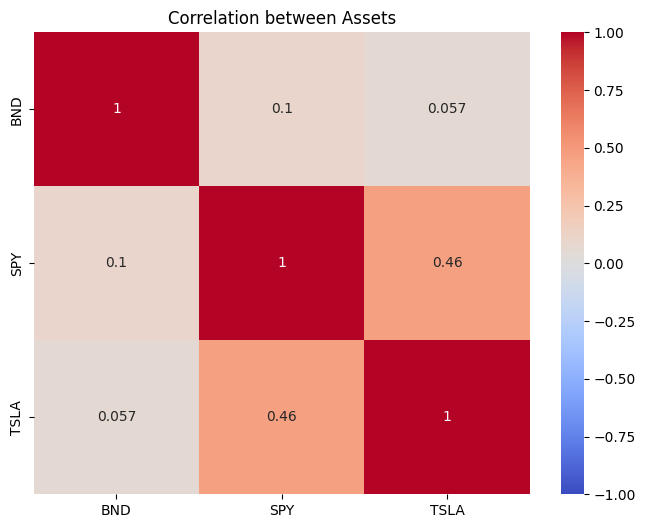


Maximum Drawdown for BND: -23.96%

Maximum Drawdown for SPY: -34.10%

Maximum Drawdown for TSLA: -73.63%
Downside Deviation for BND: 0.26%
Downside Deviation for SPY: 0.80%
Downside Deviation for TSLA: 2.38%


<Figure size 1200x600 with 0 Axes>

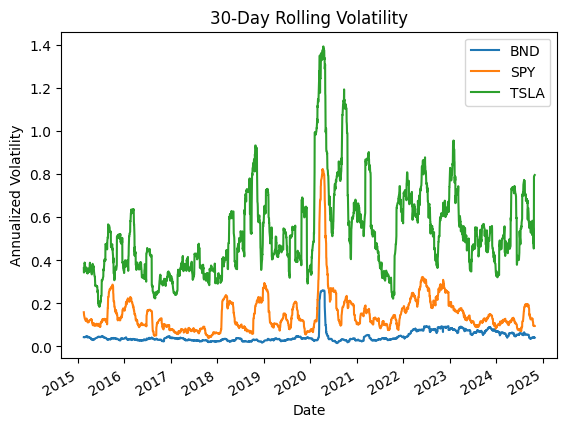

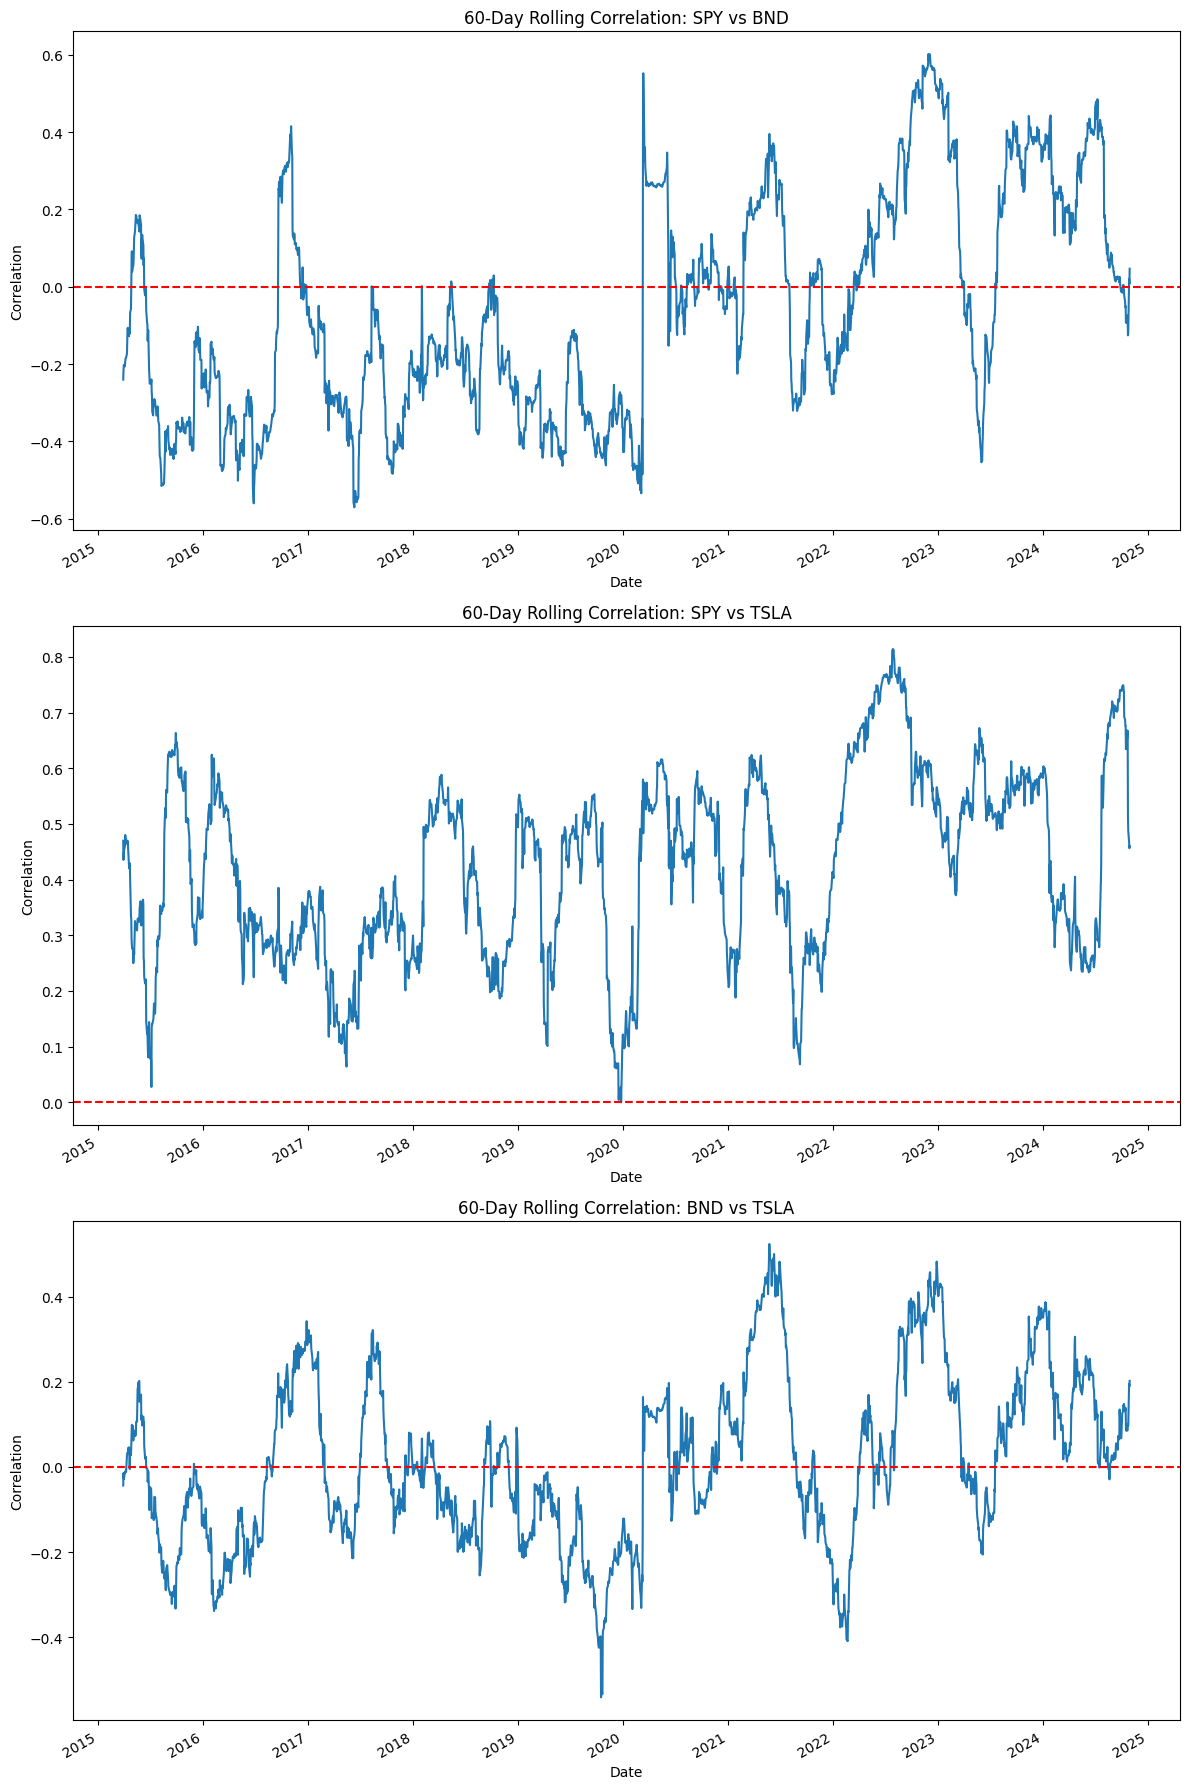


Beta of SPY relative to BND: 0.33

Beta of TSLA relative to BND: 0.59


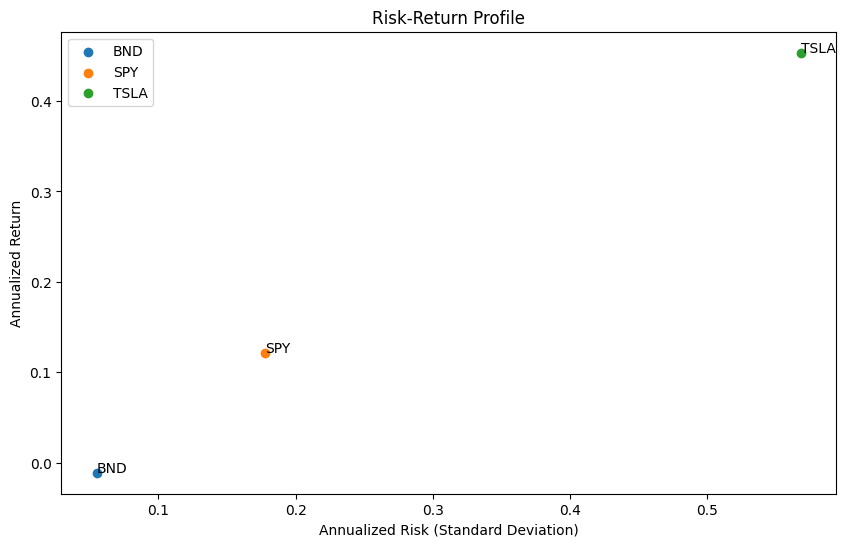

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load cleaned datasets
bnd_data = pd.read_csv('../data/cleaned_BND_data.csv')
spy_data = pd.read_csv('../data/cleaned_SPY_data.csv')
tsla_data = pd.read_csv('../data/cleaned_TSLA_data.csv')

# Ensure 'Date' is set as the index for all datasets
for df in [bnd_data, spy_data, tsla_data]:
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)

# Merge datasets
merged_data = pd.concat([bnd_data['Close'], spy_data['Close'], tsla_data['Close']], axis=1)
merged_data.columns = ['BND', 'SPY', 'TSLA']

# Calculate daily returns
returns = merged_data.pct_change().dropna()

# Function to calculate risk metrics
def calculate_risk_metrics(returns, ticker, risk_free_rate=0.02):
    var_95 = np.percentile(returns.dropna(), 5)
    sharpe_ratio = (returns.mean() - risk_free_rate/252) / returns.std() * np.sqrt(252)
    annualized_vol = returns.std() * np.sqrt(252)
    return var_95, sharpe_ratio, annualized_vol

# Calculate and display risk metrics for each asset
for ticker in ['BND', 'SPY', 'TSLA']:
    var_95, sharpe_ratio, annualized_vol = calculate_risk_metrics(returns[ticker], ticker)
    
    print(f"\nRisk Analysis for {ticker}:")
    print(f"95% Value at Risk: {var_95:.2%}")
    print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
    print(f"Annualized Volatility: {annualized_vol:.2%}")

    # Plot distribution of returns
    plt.figure(figsize=(10, 6))
    sns.histplot(returns[ticker].dropna(), kde=True, bins=50)
    plt.title(f'Distribution of Daily Returns - {ticker}')
    plt.xlabel('Daily Returns')
    plt.ylabel('Frequency')
    plt.axvline(var_95, color='r', linestyle='dashed', linewidth=2, label='95% VaR')
    plt.legend()
    plt.show()

    # Q-Q plot
    plt.figure(figsize=(10, 6))
    stats.probplot(returns[ticker].dropna(), dist="norm", plot=plt)
    plt.title(f"Q-Q plot of Daily Returns - {ticker}")
    plt.show()

# Comparison of cumulative returns
cumulative_returns = (1 + returns).cumprod()
plt.figure(figsize=(10, 6))
cumulative_returns.plot()
plt.title('Cumulative Returns Comparison')
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()

# Correlation analysis
correlation = returns.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation between Assets')
plt.show()

# Calculate maximum drawdown
def max_drawdown(return_series):
    comp_ret = (return_series + 1).cumprod()
    peak = comp_ret.expanding(min_periods=1).max()
    dd = (comp_ret/peak) - 1
    return dd.min()

for ticker in ['BND', 'SPY', 'TSLA']:
    mdd = max_drawdown(returns[ticker])
    print(f"\nMaximum Drawdown for {ticker}: {mdd:.2%}")

# Calculate downside deviation
def downside_deviation(returns, target=0):
    return np.sqrt(np.mean(np.minimum(returns - target, 0)**2))

for ticker in ['BND', 'SPY', 'TSLA']:
    dd = downside_deviation(returns[ticker])
    print(f"Downside Deviation for {ticker}: {dd:.2%}")

# Plot rolling volatility
rolling_vol = returns.rolling(window=30).std() * np.sqrt(252)
plt.figure(figsize=(12, 6))
rolling_vol.plot()
plt.title('30-Day Rolling Volatility')
plt.ylabel('Annualized Volatility')
plt.legend()
plt.show()

# Calculate and plot rolling 60-day correlations
plt.figure(figsize=(12, 18))

plt.subplot(3, 1, 1)
returns['SPY'].rolling(window=60).corr(returns['BND']).plot()
plt.title('60-Day Rolling Correlation: SPY vs BND')
plt.ylabel('Correlation')
plt.axhline(y=0, color='r', linestyle='--')

plt.subplot(3, 1, 2)
returns['SPY'].rolling(window=60).corr(returns['TSLA']).plot()
plt.title('60-Day Rolling Correlation: SPY vs TSLA')
plt.ylabel('Correlation')
plt.axhline(y=0, color='r', linestyle='--')

plt.subplot(3, 1, 3)
returns['BND'].rolling(window=60).corr(returns['TSLA']).plot()
plt.title('60-Day Rolling Correlation: BND vs TSLA')
plt.ylabel('Correlation')
plt.axhline(y=0, color='r', linestyle='--')

plt.tight_layout()
plt.show()

# Calculate and display beta for SPY and TSLA relative to BND
market_returns = returns['BND']
for ticker in ['SPY', 'TSLA']:
    covariance = returns[ticker].cov(market_returns)
    market_variance = market_returns.var()
    beta = covariance / market_variance
    print(f"\nBeta of {ticker} relative to BND: {beta:.2f}")

# Risk-return scatter plot
plt.figure(figsize=(10, 6))
for ticker in returns.columns:
    plt.scatter(returns[ticker].std() * np.sqrt(252), 
                returns[ticker].mean() * 252, 
                label=ticker)
    plt.annotate(ticker, (returns[ticker].std() * np.sqrt(252), 
                          returns[ticker].mean() * 252))

plt.xlabel('Annualized Risk (Standard Deviation)')
plt.ylabel('Annualized Return')
plt.title('Risk-Return Profile')
plt.legend()
plt.show()